<a href="https://colab.research.google.com/github/Kumbharprasad72/prasad/blob/main/EDA_INDIAN_STARTUPS_Ripynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(dplyr) #data manipulation
library(ggplot2) #data visualization



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
install.packages("readr")
library("readr")
my_data <- read_delim("startups.csv",delim=",",show_col_types = FALSE)
head(my_data)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



X,Company,City,Starting Year,Founders,Industries,Description,No. of Employees,Funding Amount in $,Funding Round,No. of Investors,age,age_category
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,Urban Company,Gurgaon,2014,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan","Apps, Home Services, Marketplace, Service Industry",Urban is a marketplace for independent contractors.,1001-5000,445920356,12,16,6,old company
1,Classplus,Noida,2018,"Bhaswat Agarwal, Bikash Dash, Mukul Rustagi, Nikhil Goel, Vatsal Rustagi","B2B, E-Learning, EdTech, Education, Mobile Apps, SaaS, Software",Classplus is a mobile-first SaaS platform that allows 3000+ tutors to totally automate their curriculum and operations.,101-250,89506451,10,20,2,new company
2,Paytm,Noida,2010,"Akshay Khanna, Vijay Shekhar Sharma","E-Commerce, Finance, Financial Services, Internet, Mobile Apps, Mobile Payments",Paytm is a payment gateway that allows users and businesses to make payments.,501-1000,32448851,4,4,10,old company
3,Apna,Mumbai,2019,Nirmit Parikh,"Employment, Human Resources, Recruiting, Staffing Agency",Apna is a professional networking and job-search platform that connects blue- and gray-collar professionals with like-minded people and places to work.,101-250,93450000,4,6,1,new company
4,Razorpay,Bengaluru,2014,"Harshil Mathur, Shashank Kumar","Financial Services, FinTech, Payments, Software","Razorpay is a payment acceptance, processing, and disbursement platform for businesses.",1001-5000,366600000,7,29,6,old company
5,UpGrad,Mumbai,2015,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh, Ronnie Screwvala","E-Learning, EdTech, Education","UpGrad is a higher education portal that offers courses in Data Science, Technology, Management, and Law online.",1001-5000,176283446,4,4,5,new company


In [3]:
str(my_data) #similar to info

spc_tbl_ [300 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ X                  : num [1:300] 0 1 2 3 4 5 6 7 8 9 ...
 $ Company            : chr [1:300] "Urban Company" "Classplus" "Paytm" "Apna" ...
 $ City               : chr [1:300] "Gurgaon" "Noida" "Noida" "Mumbai" ...
 $ Starting Year      : num [1:300] 2014 2018 2010 2019 2014 ...
 $ Founders           : chr [1:300] "Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan" "Bhaswat Agarwal, Bikash Dash, Mukul Rustagi, Nikhil Goel, Vatsal Rustagi" "Akshay Khanna, Vijay Shekhar Sharma" "Nirmit Parikh" ...
 $ Industries         : chr [1:300] "Apps, Home Services, Marketplace, Service Industry" "B2B, E-Learning, EdTech, Education, Mobile Apps, SaaS, Software" "E-Commerce, Finance, Financial Services, Internet, Mobile Apps, Mobile Payments" "Employment, Human Resources, Recruiting, Staffing Agency" ...
 $ Description        : chr [1:300] "Urban is a marketplace for independent contractors." "Classplus is a mobile-first SaaS platform tha

In [4]:
sum(is.na(my_data))

[1] 0

In [5]:
my_data <- my_data[,!names(my_data) %in% c("X","Industries")] # Removing not requiring columns

In [6]:
my_data

Company,City,Starting Year,Founders,Description,No. of Employees,Funding Amount in $,Funding Round,No. of Investors,age,age_category
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Urban Company,Gurgaon,2014,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan",Urban is a marketplace for independent contractors.,1001-5000,445920356,12,16,6,old company
Classplus,Noida,2018,"Bhaswat Agarwal, Bikash Dash, Mukul Rustagi, Nikhil Goel, Vatsal Rustagi",Classplus is a mobile-first SaaS platform that allows 3000+ tutors to totally automate their curriculum and operations.,101-250,89506451,10,20,2,new company
Paytm,Noida,2010,"Akshay Khanna, Vijay Shekhar Sharma",Paytm is a payment gateway that allows users and businesses to make payments.,501-1000,32448851,4,4,10,old company
Apna,Mumbai,2019,Nirmit Parikh,Apna is a professional networking and job-search platform that connects blue- and gray-collar professionals with like-minded people and places to work.,101-250,93450000,4,6,1,new company
Razorpay,Bengaluru,2014,"Harshil Mathur, Shashank Kumar","Razorpay is a payment acceptance, processing, and disbursement platform for businesses.",1001-5000,366600000,7,29,6,old company
UpGrad,Mumbai,2015,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh, Ronnie Screwvala","UpGrad is a higher education portal that offers courses in Data Science, Technology, Management, and Law online.",1001-5000,176283446,4,4,5,new company
Delhivery,Gurgaon,2011,"Bhavesh Manglani, Kapil Bharati, Mohit Tandon, Sahil Barua, Suraj Saharan","Delhivery is a supply chain management firm that specializes in transportation, warehousing, freight, and order fulfillment.",5001-10000,1236569361,11,13,9,old company
1mg,Gurgaon,2015,"Anurag Mundhada, Gaurav Agarwal, Prashant Tandon, Sameer Maheshwari, Vikas Chauhan",1mg is a generic drug engine and online pharmacy network platform.,Nov-50,204600209,16,17,5,new company
BigBasket,Bengaluru,2011,"Abhinay Choudhari, Hari Menon, Vipul Parekh, VS Ramesh, VS Sudhakar",BigBasket is an online grocery and meal delivery service that brings personal and household items to customers' doorsteps.,5001-10000,1119863468,17,17,9,old company


In [7]:
unique(my_data)

Company,City,Starting Year,Founders,Description,No. of Employees,Funding Amount in $,Funding Round,No. of Investors,age,age_category
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Urban Company,Gurgaon,2014,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan",Urban is a marketplace for independent contractors.,1001-5000,445920356,12,16,6,old company
Classplus,Noida,2018,"Bhaswat Agarwal, Bikash Dash, Mukul Rustagi, Nikhil Goel, Vatsal Rustagi",Classplus is a mobile-first SaaS platform that allows 3000+ tutors to totally automate their curriculum and operations.,101-250,89506451,10,20,2,new company
Paytm,Noida,2010,"Akshay Khanna, Vijay Shekhar Sharma",Paytm is a payment gateway that allows users and businesses to make payments.,501-1000,32448851,4,4,10,old company
Apna,Mumbai,2019,Nirmit Parikh,Apna is a professional networking and job-search platform that connects blue- and gray-collar professionals with like-minded people and places to work.,101-250,93450000,4,6,1,new company
Razorpay,Bengaluru,2014,"Harshil Mathur, Shashank Kumar","Razorpay is a payment acceptance, processing, and disbursement platform for businesses.",1001-5000,366600000,7,29,6,old company
UpGrad,Mumbai,2015,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh, Ronnie Screwvala","UpGrad is a higher education portal that offers courses in Data Science, Technology, Management, and Law online.",1001-5000,176283446,4,4,5,new company
Delhivery,Gurgaon,2011,"Bhavesh Manglani, Kapil Bharati, Mohit Tandon, Sahil Barua, Suraj Saharan","Delhivery is a supply chain management firm that specializes in transportation, warehousing, freight, and order fulfillment.",5001-10000,1236569361,11,13,9,old company
1mg,Gurgaon,2015,"Anurag Mundhada, Gaurav Agarwal, Prashant Tandon, Sameer Maheshwari, Vikas Chauhan",1mg is a generic drug engine and online pharmacy network platform.,Nov-50,204600209,16,17,5,new company
BigBasket,Bengaluru,2011,"Abhinay Choudhari, Hari Menon, Vipul Parekh, VS Ramesh, VS Sudhakar",BigBasket is an online grocery and meal delivery service that brings personal and household items to customers' doorsteps.,5001-10000,1119863468,17,17,9,old company


In [8]:
unique(my_data$age_category) #uniue values in Column Age_category

[1] "old company"   "new company"   "older company"

In [9]:
colnames(my_data)[3]<- "Starting_Year"
colnames(my_data)[6]<- "No_Of_Employees"
colnames(my_data)[7] <- "Funding_Amount_in"
colnames(my_data)[8] <- "Funding_Round"
colnames(my_data)[9] <- "No_of_Investors"
head(my_data)

Company,City,Starting_Year,Founders,Description,No_Of_Employees,Funding_Amount_in,Funding_Round,No_of_Investors,age,age_category
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Urban Company,Gurgaon,2014,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan",Urban is a marketplace for independent contractors.,1001-5000,445920356,12,16,6,old company
Classplus,Noida,2018,"Bhaswat Agarwal, Bikash Dash, Mukul Rustagi, Nikhil Goel, Vatsal Rustagi",Classplus is a mobile-first SaaS platform that allows 3000+ tutors to totally automate their curriculum and operations.,101-250,89506451,10,20,2,new company
Paytm,Noida,2010,"Akshay Khanna, Vijay Shekhar Sharma",Paytm is a payment gateway that allows users and businesses to make payments.,501-1000,32448851,4,4,10,old company
Apna,Mumbai,2019,Nirmit Parikh,Apna is a professional networking and job-search platform that connects blue- and gray-collar professionals with like-minded people and places to work.,101-250,93450000,4,6,1,new company
Razorpay,Bengaluru,2014,"Harshil Mathur, Shashank Kumar","Razorpay is a payment acceptance, processing, and disbursement platform for businesses.",1001-5000,366600000,7,29,6,old company
UpGrad,Mumbai,2015,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh, Ronnie Screwvala","UpGrad is a higher education portal that offers courses in Data Science, Technology, Management, and Law online.",1001-5000,176283446,4,4,5,new company


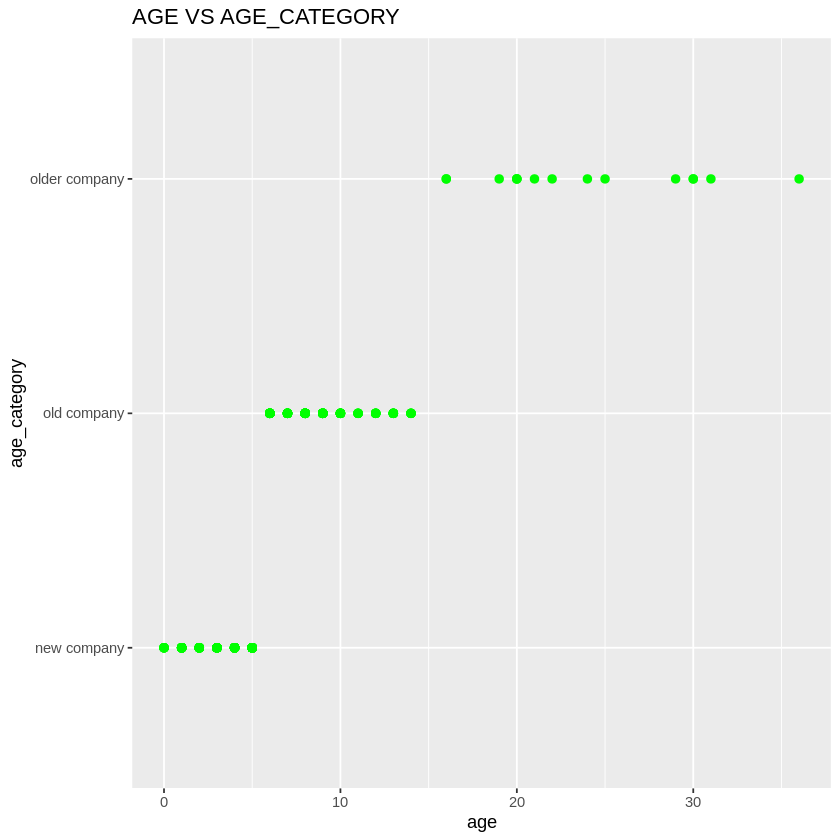

In [10]:
ggplot(data = my_data, mapping = aes(x = age, y =age_category)) +
  geom_point(col="green",size=2)+labs(title ="AGE VS AGE_CATEGORY")

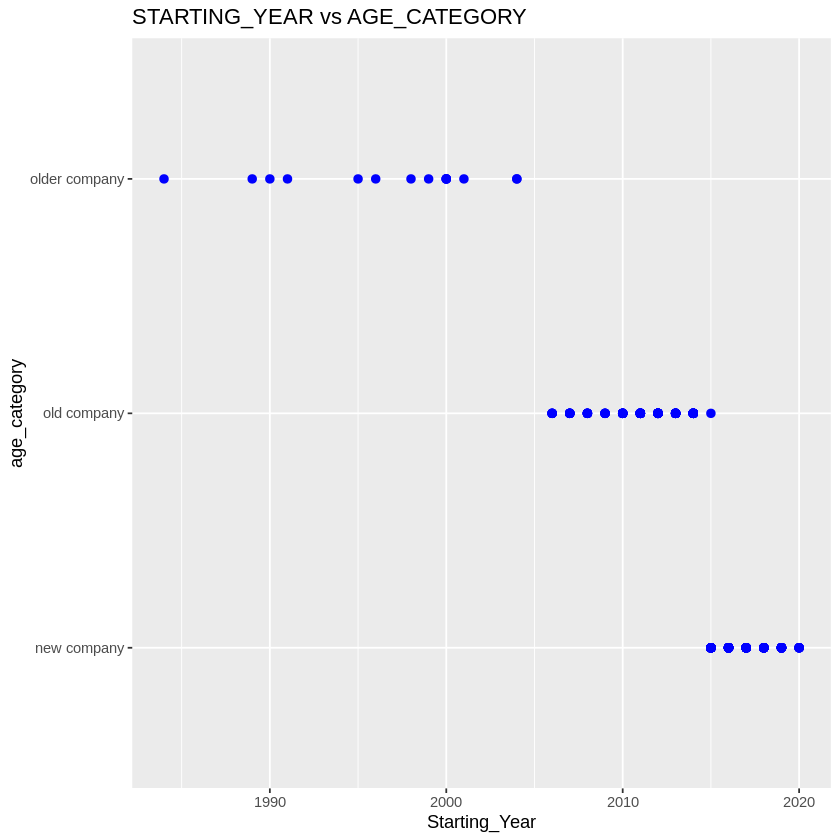

In [11]:
ggplot(data = my_data, mapping = aes(x =Starting_Year, y =age_category)) +
  geom_point(col="blue",size=2)+labs(title="STARTING_YEAR vs AGE_CATEGORY")
# older companies are below 2005
# old companies are in between 2005-2015
# new comanies are above 2015

In [12]:
as.data.frame(table(my_data$age_category))  # no. of companies as per age

Var1,Freq
<fct>,<int>
new company,164
old company,121
older company,15


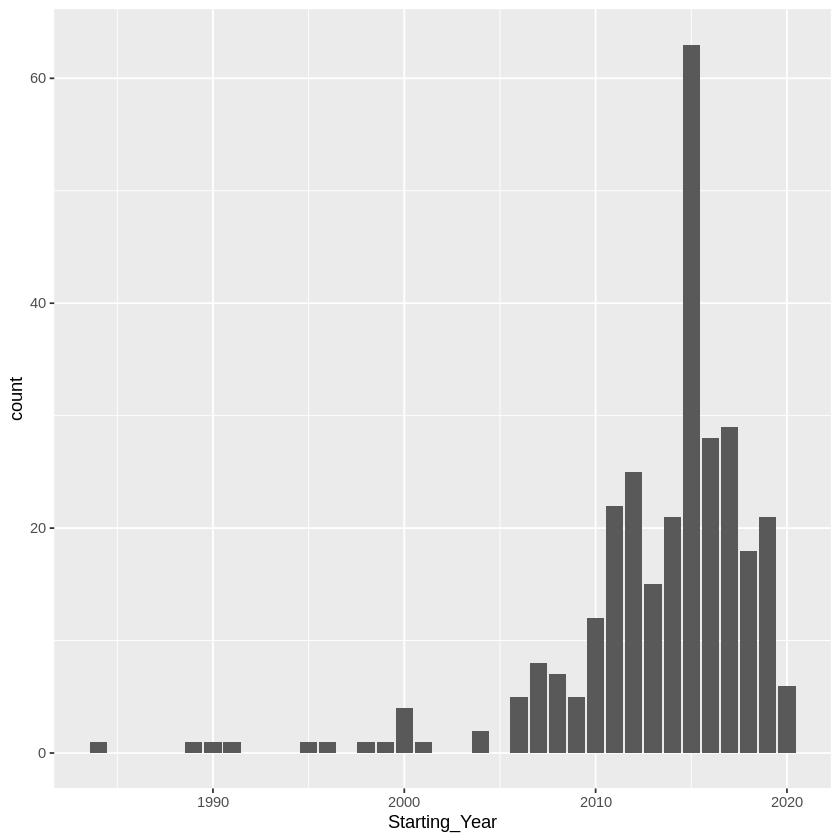

In [13]:
library(ggplot2)
p <- ggplot(my_data, aes(Starting_Year))
p <- p + geom_bar()
print(p)
# we get maximum startups started in between 2010-2020
# maximum startups are in 2015 which is above 60

In [14]:
as.data.frame(table(my_data$City)) # Maximum companies are started in bengaluru


Var1,Freq
<fct>,<int>
Ahmedabad,4
Andheri,1
Azadpur,1
Bengaluru,123
Chennai,6
Delhi,3
Faridabad,2
Gurgaon,47
Haryana,3


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“at  2006”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“radius  0.0004”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“all data on boundary of neighborhood. make span bigger”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 2006”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.02”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  1”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametri

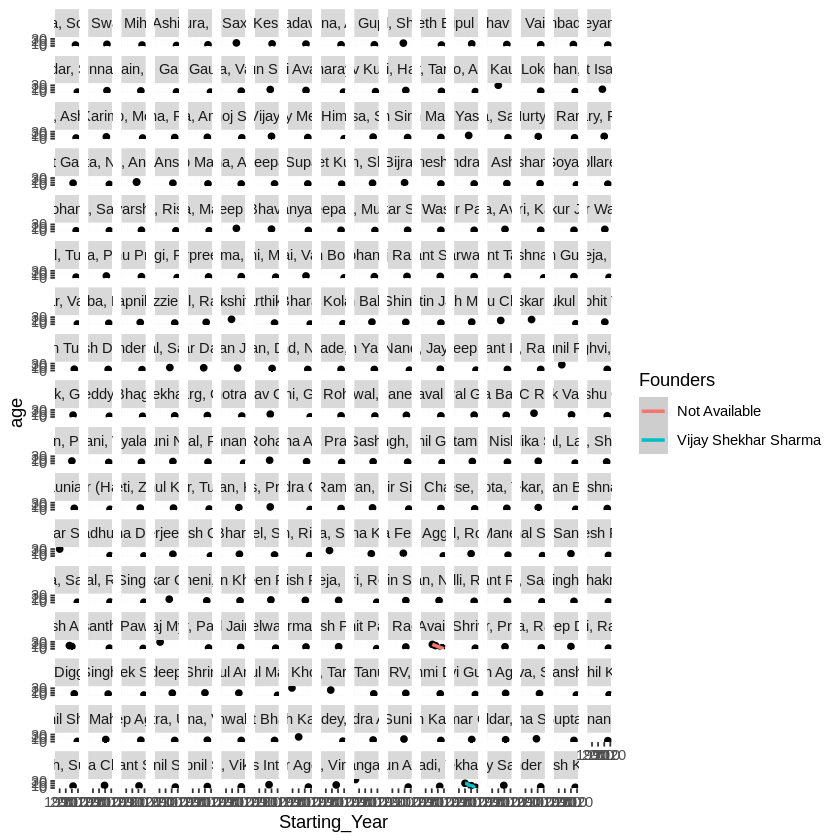

In [15]:
ggplot(data =my_data, mapping = aes(x =Starting_Year, y =age)) +
  geom_point() +
  geom_smooth(aes(color =Founders)) +
  facet_wrap(~Founders)
# Showing vijay shekhar sharma has highest startups

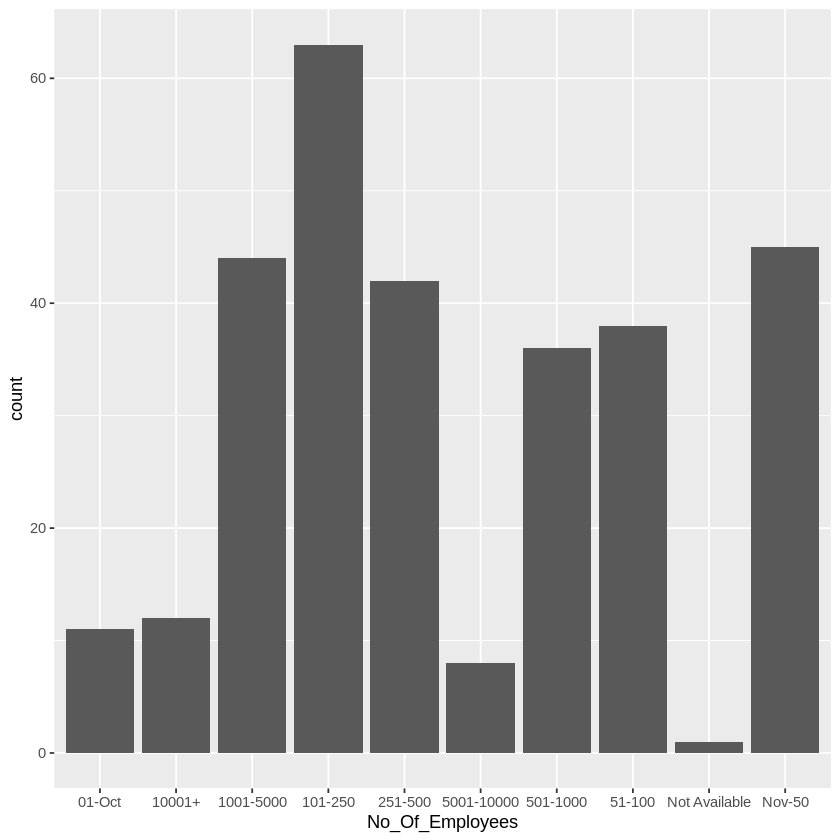

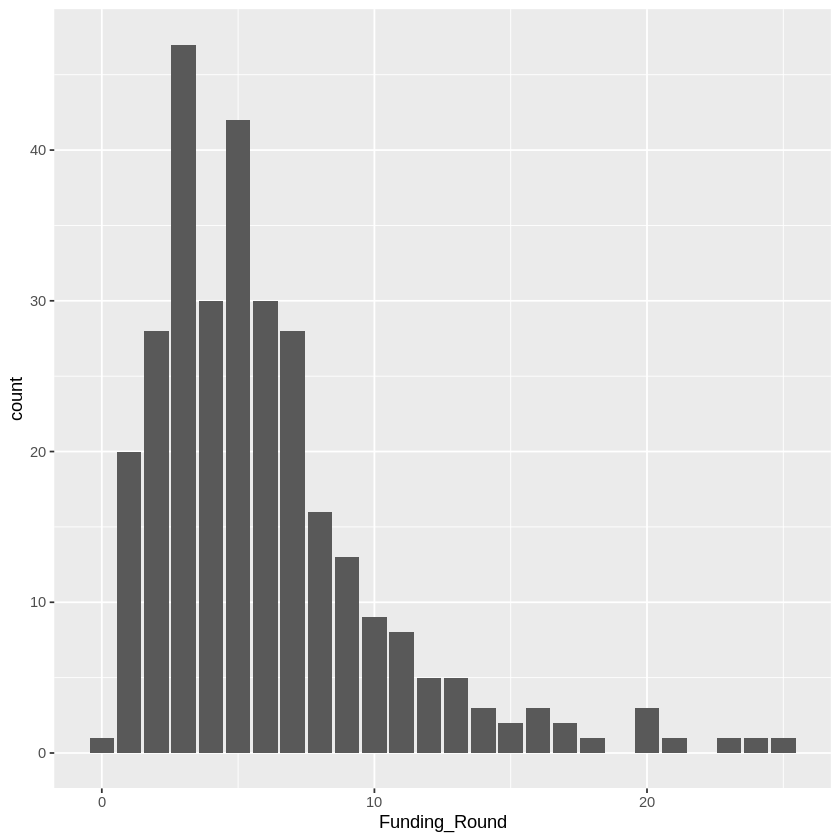

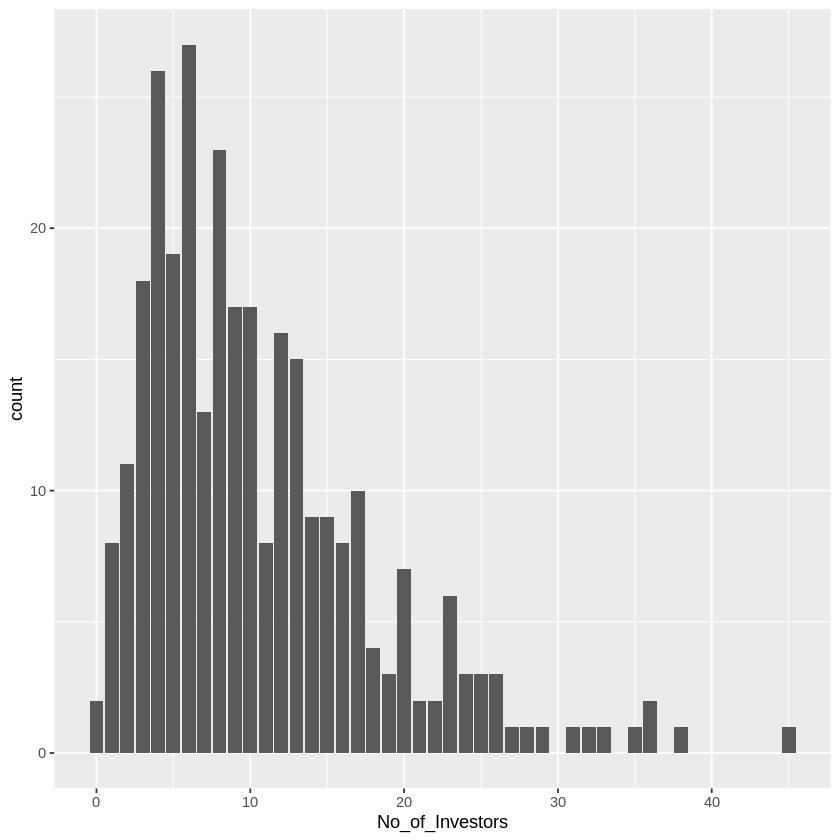

In [16]:
library(ggplot2)
p <- ggplot(my_data, aes(No_Of_Employees))
p <- p + geom_bar()
print(p)
# Mostly startups has of employee numbers 101-250
library(ggplot2)
p <- ggplot(my_data, aes(Funding_Round))
p <- p + geom_bar()
print(p)
# more than 45 startups has 3 funding round
# more than 40 startups has 5 funding round
library(ggplot2)
p <- ggplot(my_data, aes(No_of_Investors))
p <- p + geom_bar()
print(p)
# mostly startups has 4-6 investers

In [17]:
my_data %>%
    summarise(avg_Funding = mean(Funding_Amount_in),
              min_Funding = min(Funding_Amount_in),
              max_Funding = max(Funding_Amount_in),
              total = n())



avg_Funding,min_Funding,max_Funding,total
<dbl>,<dbl>,<dbl>,<int>
314865494,0,24767620475,300


In [18]:
my_data %>% arrange(Funding_Amount_in, order(Company))

# Relience jio has highest fundings

Company,City,Starting_Year,Founders,Description,No_Of_Employees,Funding_Amount_in,Funding_Round,No_of_Investors,age,age_category
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
WOW Skin Science India Ltd,Bengaluru,2016,Not Available,WOW Skin Science is a line of anti-aging products. Night is a facial care company that started on the internet.,Not Available,0,0,0,4,new company
Digital Class E-Learning Marketplace,Ahmedabad,2017,"Hitesh Mohkar, Tushar Dhakate",Sellers and consumers of online courses can meet on this educational marketplace.,Nov-50,42000,1,0,3,new company
Convin,Bengaluru,2019,"Ashish Santhalia, Atul Shree, Bharat Patidar, Durgesh Choudhary",Convin is a conversation intelligence technology that aids remote sales teams in better understanding talks.,Nov-50,300000,1,7,1,new company
Polygon (Previously Matic Network),Mumbai,2017,Not Available,Matic Network is a scalability platform for blockchains.,Nov-50,450000,3,4,3,new company
BimaPe,Mumbai,2020,Rahul Mathur,"For individuals and families across India, BimaPe demystifies insurance and its management. 'BimaPe Bharosa Karo' means 'BimaPe Bharosa Karo.'",01-Oct,545000,2,5,0,new company
Fyllo,Bengaluru,2019,"Sachin Gautam, Sudhanshu Rai, Sumit Sheoran",Fyllo is a precision agriculture service provider that uses IoT and AI.,Nov-50,557033,4,6,1,new company
PlanetSpark,Gurgaon,2016,"Kunal Malik, Maneesh Dhooper",PlanetSpark is an after-school math and English program for children in grades two through seven.,01-Oct,576000,2,4,4,new company
F5 Refreshement,New Delhi,2018,"Lalit Aggarwal, Raghav Arora",F5 Refreshment is a company that produces snacks and beverages.,51-100,621291,2,6,2,new company
Flatheads,Bengaluru,2019,"Ganesh Balakrishnan, Utkarsh Biradar",Flatheads is a global lifestyle brand that designs and manufactures shoes in India. Flatheads was the first company in India to introduce bamboo footwear.,Nov-50,725000,2,7,1,new company


In [19]:
my_data %>% arrange(Funding_Amount_in, order(City))

# Mumbai city companies has highest fundings


Company,City,Starting_Year,Founders,Description,No_Of_Employees,Funding_Amount_in,Funding_Round,No_of_Investors,age,age_category
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
WOW Skin Science India Ltd,Bengaluru,2016,Not Available,WOW Skin Science is a line of anti-aging products. Night is a facial care company that started on the internet.,Not Available,0,0,0,4,new company
Digital Class E-Learning Marketplace,Ahmedabad,2017,"Hitesh Mohkar, Tushar Dhakate",Sellers and consumers of online courses can meet on this educational marketplace.,Nov-50,42000,1,0,3,new company
Convin,Bengaluru,2019,"Ashish Santhalia, Atul Shree, Bharat Patidar, Durgesh Choudhary",Convin is a conversation intelligence technology that aids remote sales teams in better understanding talks.,Nov-50,300000,1,7,1,new company
Polygon (Previously Matic Network),Mumbai,2017,Not Available,Matic Network is a scalability platform for blockchains.,Nov-50,450000,3,4,3,new company
BimaPe,Mumbai,2020,Rahul Mathur,"For individuals and families across India, BimaPe demystifies insurance and its management. 'BimaPe Bharosa Karo' means 'BimaPe Bharosa Karo.'",01-Oct,545000,2,5,0,new company
Fyllo,Bengaluru,2019,"Sachin Gautam, Sudhanshu Rai, Sumit Sheoran",Fyllo is a precision agriculture service provider that uses IoT and AI.,Nov-50,557033,4,6,1,new company
PlanetSpark,Gurgaon,2016,"Kunal Malik, Maneesh Dhooper",PlanetSpark is an after-school math and English program for children in grades two through seven.,01-Oct,576000,2,4,4,new company
F5 Refreshement,New Delhi,2018,"Lalit Aggarwal, Raghav Arora",F5 Refreshment is a company that produces snacks and beverages.,51-100,621291,2,6,2,new company
Flatheads,Bengaluru,2019,"Ganesh Balakrishnan, Utkarsh Biradar",Flatheads is a global lifestyle brand that designs and manufactures shoes in India. Flatheads was the first company in India to introduce bamboo footwear.,Nov-50,725000,2,7,1,new company


In [20]:
my_data %>% arrange(age, order(Company))
# Five Star Business Finance is oldest one


Company,City,Starting_Year,Founders,Description,No_Of_Employees,Funding_Amount_in,Funding_Round,No_of_Investors,age,age_category
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
unlu,Gurgaon,2020,"Akshay Pruthi, Anurag Dalia, Himanshu Periwal, Vipul Agrawal",unlu is a celebrity interaction platform that enables consumers and brands to receive endorsements from well-known figures.,Nov-50,1284058,2,4,0,new company
BimaPe,Mumbai,2020,Rahul Mathur,"For individuals and families across India, BimaPe demystifies insurance and its management. 'BimaPe Bharosa Karo' means 'BimaPe Bharosa Karo.'",01-Oct,545000,2,5,0,new company
Koo App,Bengaluru,2020,"Aprameya Radhakrishna, Mayank Bidawatka",Koo App is a social networking platform headquartered in India that allows users to post audio and video.,Nov-50,33997488,3,10,0,new company
Teachmint,Bengaluru,2020,"Anshuman Kumar, Divyansh Bordia, Mihir Gupta, Payoj Jain",Teachmint is an online learning platform that focuses on the connection between tutors and students.,51-100,20000000,3,5,0,new company
Zolve,Bengaluru,2020,Not Available,"Zolve gives financial aid to immigrants, allowing them to become financially self-sufficient.",Nov-50,15000000,1,9,0,new company
Bimaplan,Bengaluru,2020,Not Available,Insurance for the next billion Indians at an affordable price,01-Oct,3000000,2,27,0,new company
Groww,Bengaluru,2017,"Harsh Jain, Ishan Bansal, Lalit Keshre, Neeraj Singh",Groww is a new investment platform that combines stockbroking and direct mutual funds to provide a new way to invest money.,251-500,142262674,6,16,1,new company
Plum,Bengaluru,2019,"Abhishek Poddar, Saurabh Arora",Health insurance and perks of high quality,Nov-50,20645163,5,23,1,new company
Masai School,Bengaluru,2019,Prateek Shukla,Masai School is a software training company that focuses on helping people get jobs.,01-Oct,7483079,3,4,1,new company


In [21]:
my_data %>% arrange(Funding_Round, order(Company))
# Ola has highest funding rounds

Company,City,Starting_Year,Founders,Description,No_Of_Employees,Funding_Amount_in,Funding_Round,No_of_Investors,age,age_category
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
WOW Skin Science India Ltd,Bengaluru,2016,Not Available,WOW Skin Science is a line of anti-aging products. Night is a facial care company that started on the internet.,Not Available,0,0,0,4,new company
Avataar.Me,Bengaluru,2016,"Gaurav Baid, Mayank Tiwari, Prashanth Aluru, Sravanth Aluru",Avataar.Me is a high-tech provider of AR and VR services that are utilized to turn 2D design materials into 3D social media campaigns.,51-100,7000000,1,1,4,new company
Digital Class E-Learning Marketplace,Ahmedabad,2017,"Hitesh Mohkar, Tushar Dhakate",Sellers and consumers of online courses can meet on this educational marketplace.,Nov-50,42000,1,0,3,new company
InstantPay,New Delhi,2013,Shailendra Agarwal,Larger India's Financial Services,51-100,4080000,1,2,7,old company
SBI Life,Mumbai,2001,Not Available,SBI Life is a life insurance company that provides a variety of plans and policies to safeguard you and your loved ones.,10001+,742000000,1,2,19,older company
SafexPay,Thane,2017,Ravi Gupta,Safexpay is a B2B2B finance company that specializes in platform and API infrastructure for businesses all over the world.,51-100,5280000,1,2,3,new company
Freight Tiger,Mumbai,2014,Swapnil Shah,"Freight Transactions that are simple, efficient, and transparent.",Nov-50,6600000,1,3,6,old company
Aknamed,Bengaluru,2018,"Saurabh Pandey, Varun Vohra","In India, Aknamed is optimizing the healthcare supply chain.",51-100,7000000,1,1,2,new company
Convin,Bengaluru,2019,"Ashish Santhalia, Atul Shree, Bharat Patidar, Durgesh Choudhary",Convin is a conversation intelligence technology that aids remote sales teams in better understanding talks.,Nov-50,300000,1,7,1,new company


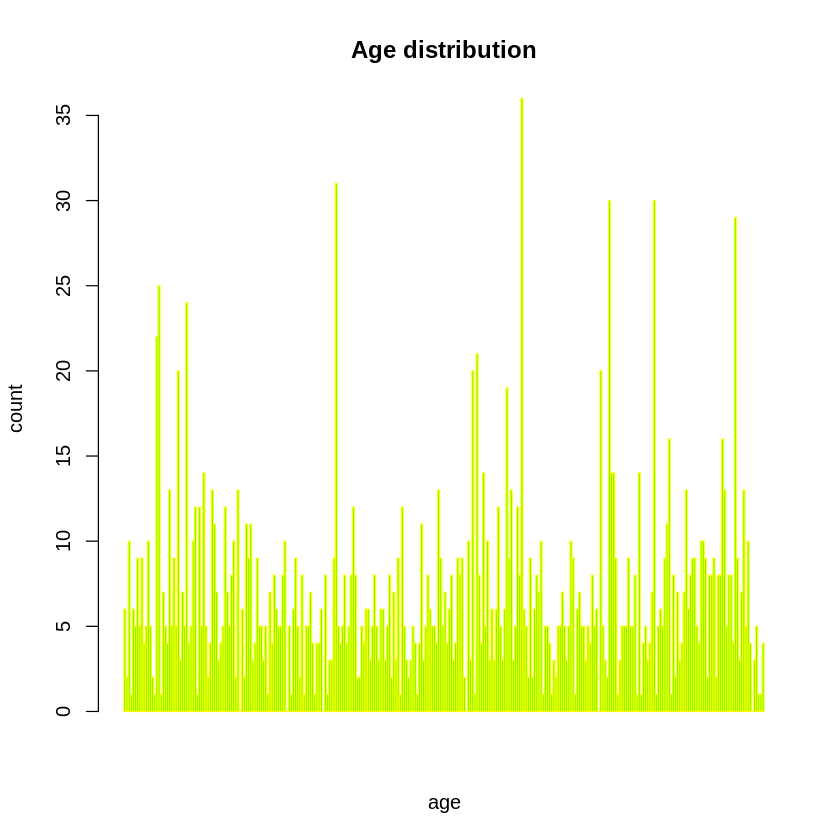

In [22]:
barplot(my_data$age,
main="Age distribution",
xlab="age",
ylab="count",
col="green",
border = "yellow")


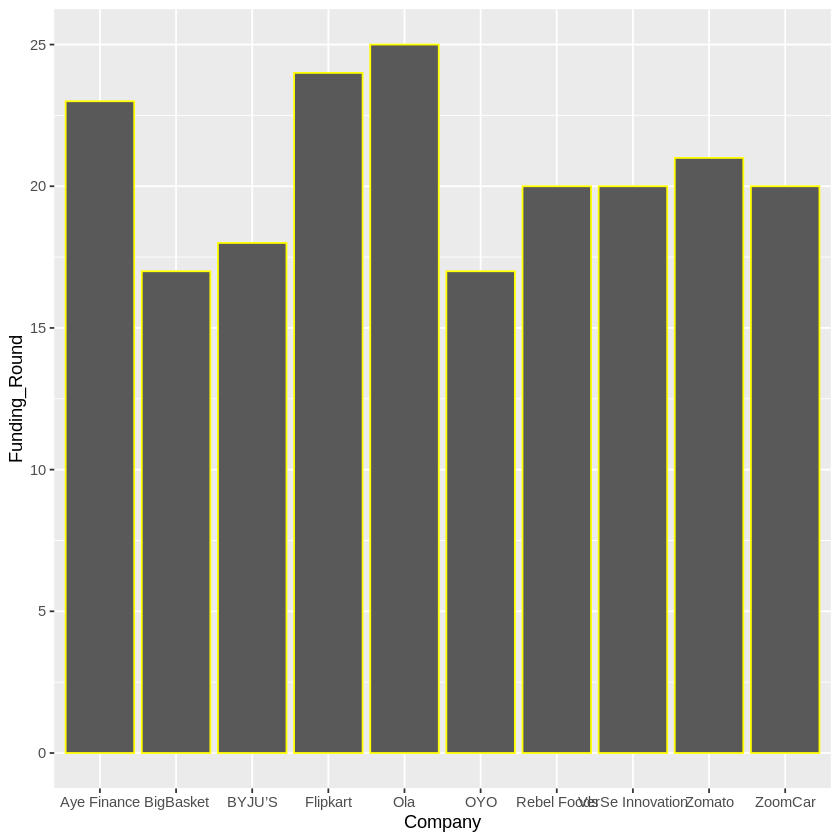

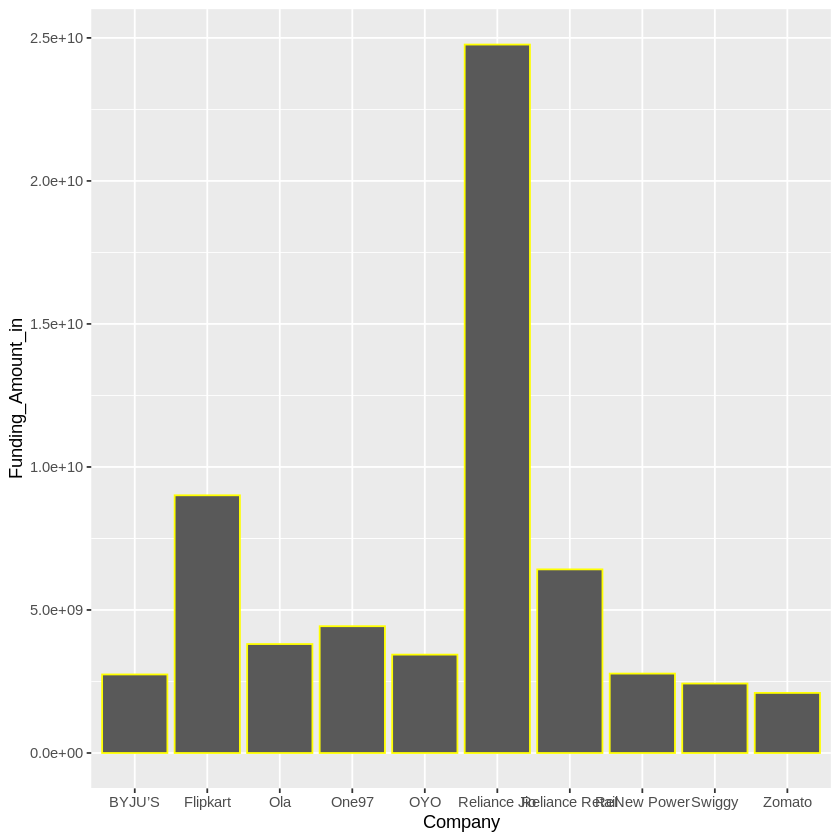

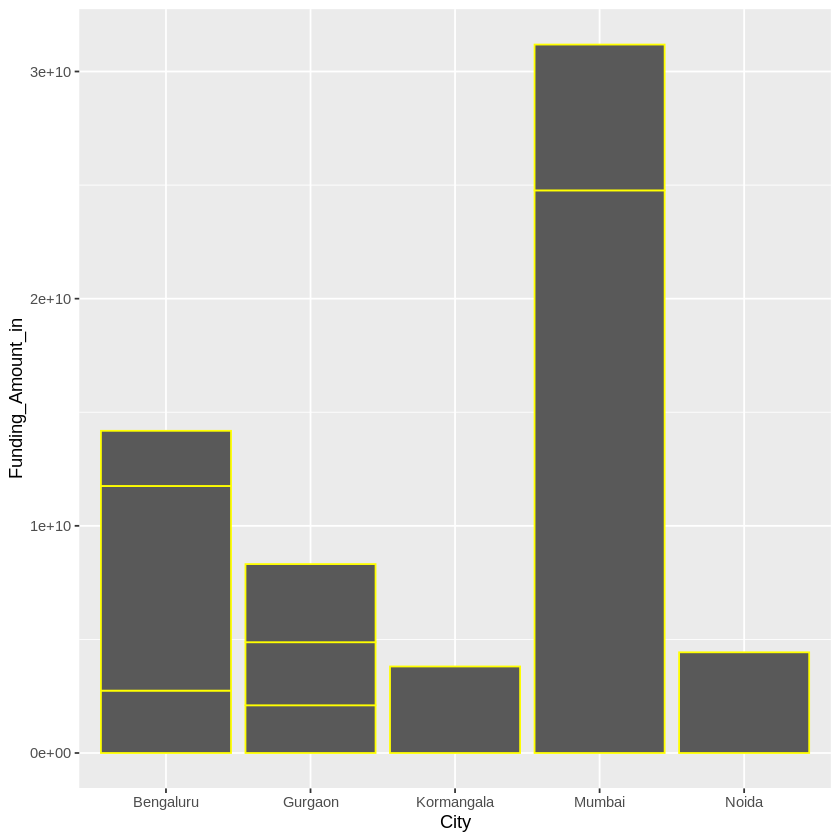

In [23]:
# Top 10 Funding_Round companies
my_data %>%
  top_n(10, Funding_Round) %>%
  ggplot()+geom_bar(mapping=aes(x=Company,y=Funding_Round),stat = "identity",col="yellow")
# Top 10 companies having high Fundung_amount_in
my_data %>%
  top_n(10,Funding_Amount_in) %>%
  ggplot()+geom_bar(mapping=aes(x=Company,y=Funding_Amount_in),stat = "identity",col="yellow")
# Top cities having high funding
my_data %>%
  top_n(10,Funding_Amount_in) %>%
  ggplot()+geom_bar(mapping=aes(x=City,y=Funding_Amount_in),stat = "identity",col="yellow")


#From this Dataset we can say that
#Reliance Jio is highest_funding_in company with funding round lower than Ola
#Bengluru city had a highest startup companies but Funding amount is lower than Mumbai
# Mostly startups has of employee numbers 101-250
# Showing vijay shekhar sharma has highest startups with 3